In [1]:
conda list

# packages in environment at /Users/rich/miniconda3/envs/tensorflow:
#
# Name                    Version                   Build  Channel
absl-py                   1.4.0                    pypi_0    pypi
anyio                     3.7.1              pyhd8ed1ab_0    conda-forge
appnope                   0.1.3              pyhd8ed1ab_0    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0          py310h8e9501a_3    conda-forge
asttokens                 2.2.1              pyhd8ed1ab_0    conda-forge
astunparse                1.6.3                    pypi_0    pypi
attrs                     23.1.0             pyh71513ae_1    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                pyhd8ed1ab_3    conda-forge
backports.functools_lru_cache 1.6.5              pyhd8ed1ab_0    conda-forge
bayesian-optimization     1.4.3                    pypi_0    pypi
bea

In [2]:
pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
anyio                         3.7.1
appnope                       0.1.3
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.2.1
astunparse                    1.6.3
attrs                         23.1.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.5
bayesian-optimization         1.4.3
beautifulsoup4                4.12.2
bleach                        6.0.0
blinker                       1.6.2
boto3                         1.28.1
botocore                      1.31.1
brotlipy                      0.7.0
cached-property               1.5.2
cachetools                    5.3.1
certifi                       2023.5.7
cffi                          1.15.1
chardet                       5.1.0
charset-normalizer            3.1.0
click                         8.1.4
cloudpickle                   2.2.1
colorama  

In [1]:
import torch
from torch.utils import data as data_
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torchvision

In [2]:
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = False

100%|██████████| 9912422/9912422 [00:00<00:00, 32074678.33it/s]


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 1855831.57it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 9351877.91it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 41595040.98it/s]


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



/home/parallels/miniconda/envs/MachineLearning/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/parallels/miniconda/envs/MachineLearning/lib/python3.10/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000, 28, 28])
torch.Size([60000])


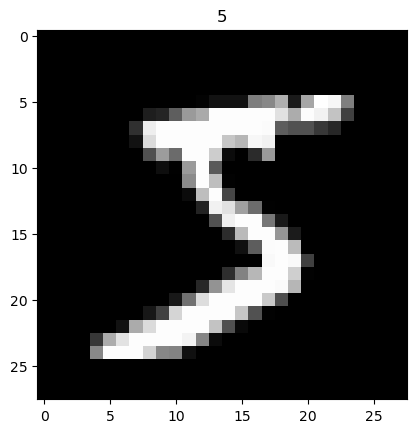

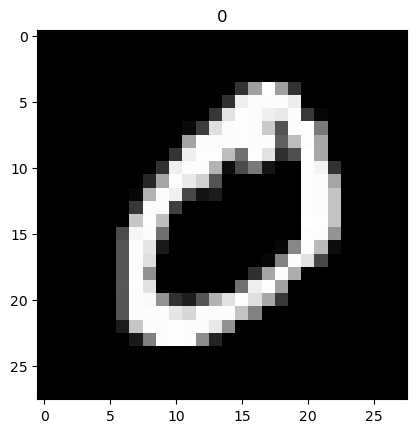

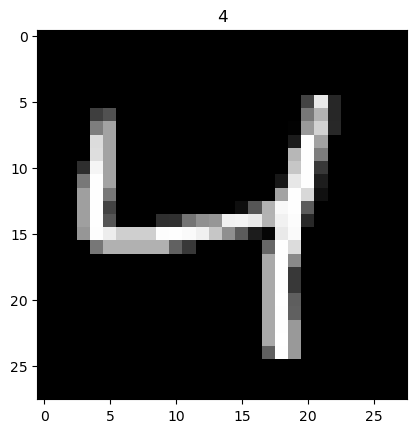

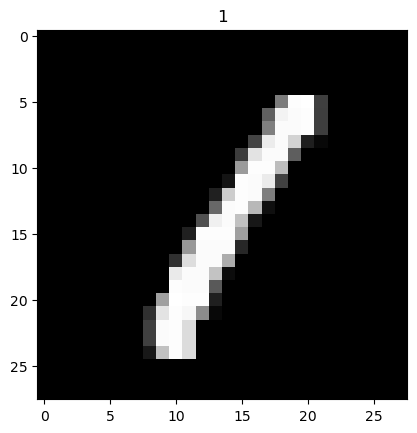

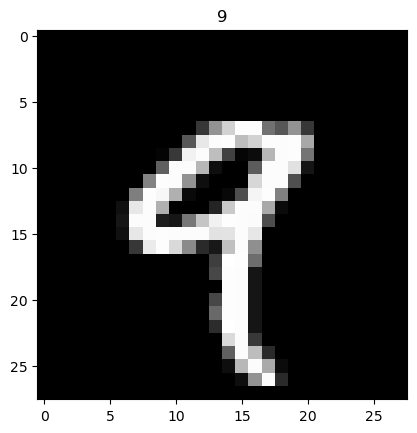

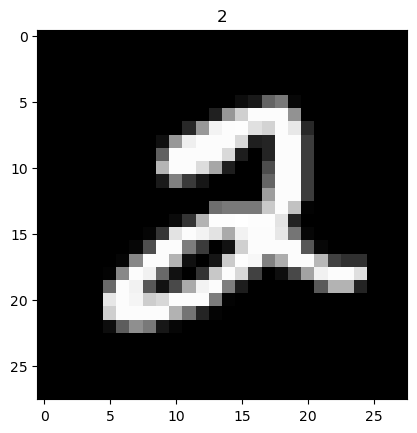

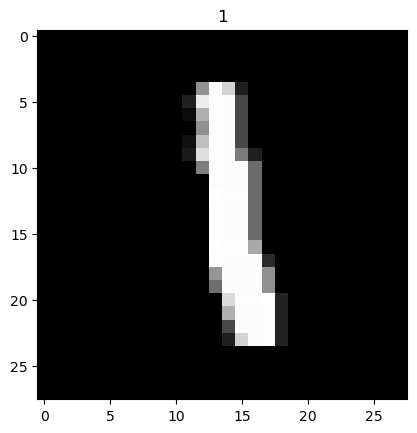

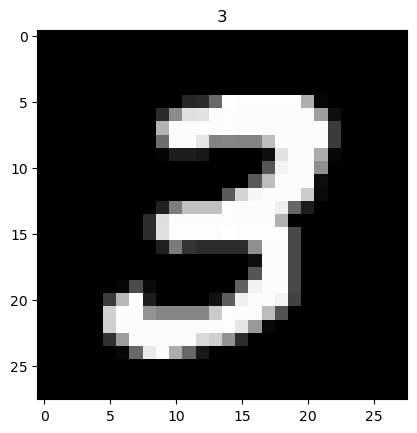

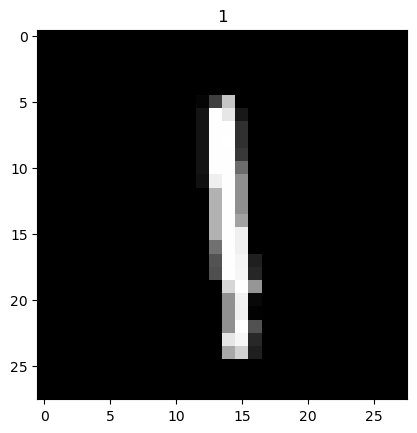

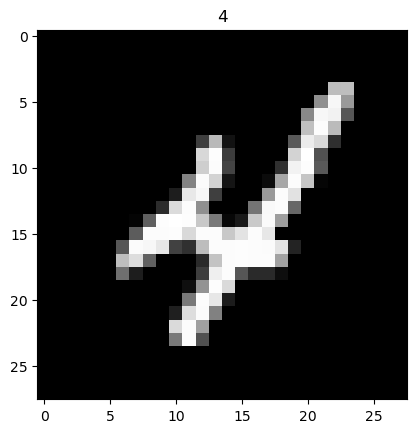

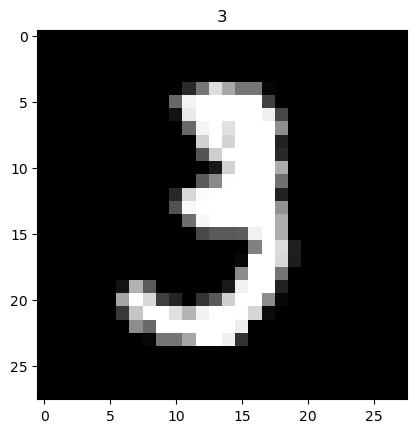

In [4]:
train_data = torchvision.datasets.MNIST(root = './mnist',train = True,transform = torchvision.transforms.ToTensor(),download = True)

print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.ion()
for i in range(11):
  plt.imshow(train_data.train_data[i].numpy(), cmap = 'gray')
  plt.title('%i' % train_data.train_labels[i])
  plt.pause(0.5)
plt.show()

In [5]:
train_loader = data_.DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle = True,num_workers = 2)

test_data = torchvision.datasets.MNIST(root = './mnist/', train = False)
test_x = torch.unsqueeze(test_data.test_data, dim = 1).type(torch.FloatTensor)[:2000]/255.
test_y = test_data.test_labels[:2000]

/home/parallels/miniconda/envs/MachineLearning/lib/python3.10/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/parallels/miniconda/envs/MachineLearning/lib/python3.10/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [6]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Sequential(
        nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5, stride = 1, padding = 2,),# stride = 1, padding = (kernel_size-1)/2 = (5-1)/2
        nn.ReLU(),# (16, 28, 28)
        nn.MaxPool2d(kernel_size = 2),# (16, 14, 14)
    )
    self.conv2 = nn.Sequential(# (16, 14, 14)
        nn.Conv2d(16, 32, 5, 1, 2),# (32, 14, 14)
        nn.ReLU(),# (32,14,14)
        nn.MaxPool2d(2)# (32, 7, 7)
    )
    self.out = nn.Linear(32*7*7, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(x.size(0), -1)
    output = self.out(x)
    return output, x

cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [7]:
optimization = torch.optim.Adam(cnn.parameters(), lr = LR)
loss_func = nn.CrossEntropyLoss()

In [8]:
for epoch in range(EPOCH):
  for step, (batch_x, batch_y) in enumerate(train_loader):
    bx = Variable(batch_x)
    by = Variable(batch_y)
    output = cnn(bx)[0]
    loss = loss_func(output, by)
    optimization.zero_grad()
    loss.backward()
    optimization.step()

    if step % 50 == 0:
        test_output, last_layer = cnn(test_x)
        pred_y = torch.max(test_output, 1)[1].data.numpy()
        accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
        print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

Epoch:  0 | train loss: 2.3116 | test accuracy: 0.18
Epoch:  0 | train loss: 0.4911 | test accuracy: 0.83
Epoch:  0 | train loss: 0.2130 | test accuracy: 0.89
Epoch:  0 | train loss: 0.1960 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2301 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1004 | test accuracy: 0.95
Epoch:  0 | train loss: 0.2240 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1170 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1235 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0647 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0138 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0634 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1473 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1469 | test accuracy: 0.97
Epoch:  0 | train loss: 0.2717 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0304 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1938 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1219 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0357 | test accuracy

In [9]:
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec